In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
errors = pd.read_csv("PdM_errors.csv")
failures = pd.read_csv("PdM_failures.csv")
machines = pd.read_csv("PdM_machines.csv")
maintenance = pd.read_csv("PdM_maint.csv")
telemetry = pd.read_csv("PdM_telemetry.csv")

## Dataset Description

We're working with the Microsoft Azure Predictive Maintenance dataset, a synthetic dataset that simulates machine health over the course of a year across 100 unique machines. 

The available data includes:

**Telemetry**: Hourly readings of Voltage, Rotation, Pressure, and Vibration
**Errors**: Timestamped logs of error codes (types 1–5)
**Maintenance**: Logs of component replacements (components 1–4), regardless of failure
**Failure**: Logs of component replacements due to failure
**Machines**: Machine age and model type

In [30]:
comp_fail_plot_df = failures['failure'].value_counts().reset_index()
comp_fail_plot_df['percentage'] = (comp_fail_plot_df['failure'] / comp_fail_plot_df['failure'].sum()) * 100
comp_fail_plot_df = comp_fail_plot_df.sort_values(by='index')
comp_fail_plot_df

,index,failure,percentage
1,comp1,192,25.229961
0,comp2,259,34.034166
3,comp3,131,17.214192
2,comp4,179,23.521682


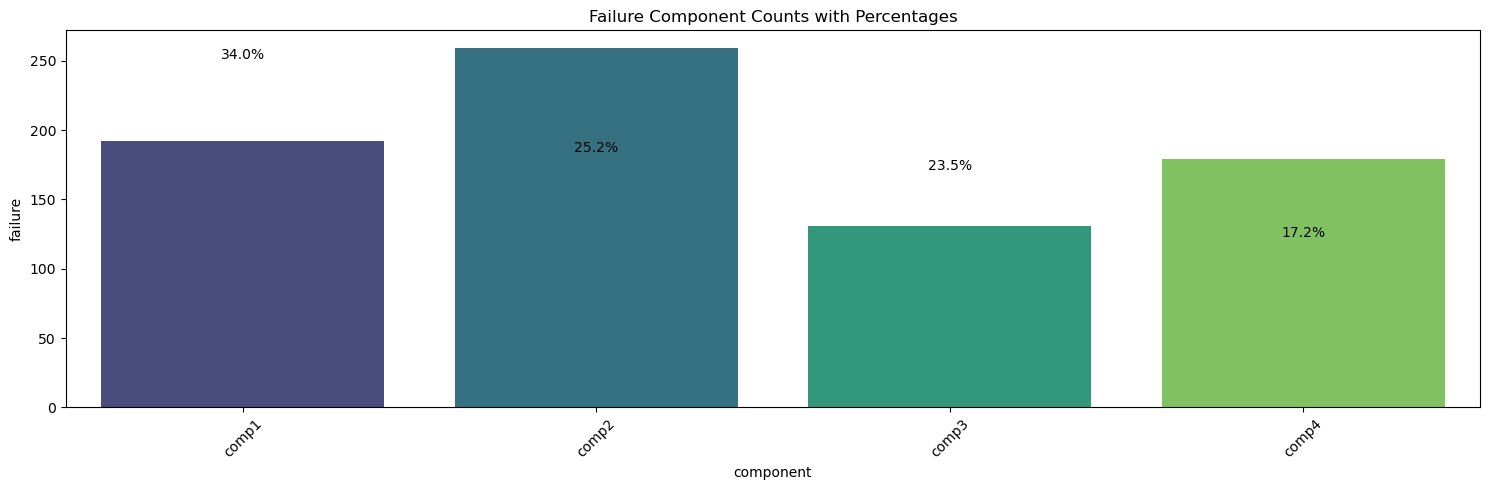

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(data=comp_fail_plot_df, x='index', y='failure', palette='viridis')

for i, row in comp_fail_plot_df.iterrows():
    plt.text(i, row['failure'], f"{row['percentage']:.1f}%", ha='center', va='top')

plt.xticks(rotation=45)
plt.title("Failure Component Counts with Percentages")

plt.xlabel("component")
plt.tight_layout()

In [33]:
mach_fail_plot_df = failures['machineID'].value_counts().reset_index()
mach_fail_plot_df = mach_fail_plot_df.sort_values(by='index')
mach_fail_plot_df['percentage'] = (mach_fail_plot_df['machineID'] / mach_fail_plot_df['machineID'].sum()) * 100
mach_fail_plot_df

,index,machineID,percentage
51,1,7,0.919842
82,2,4,0.525624
73,3,5,0.657030
67,4,6,0.788436
55,5,7,0.919842
...,...,...,...
72,96,5,0.657030
41,97,8,1.051248
1,98,16,2.102497
0,99,19,2.496715


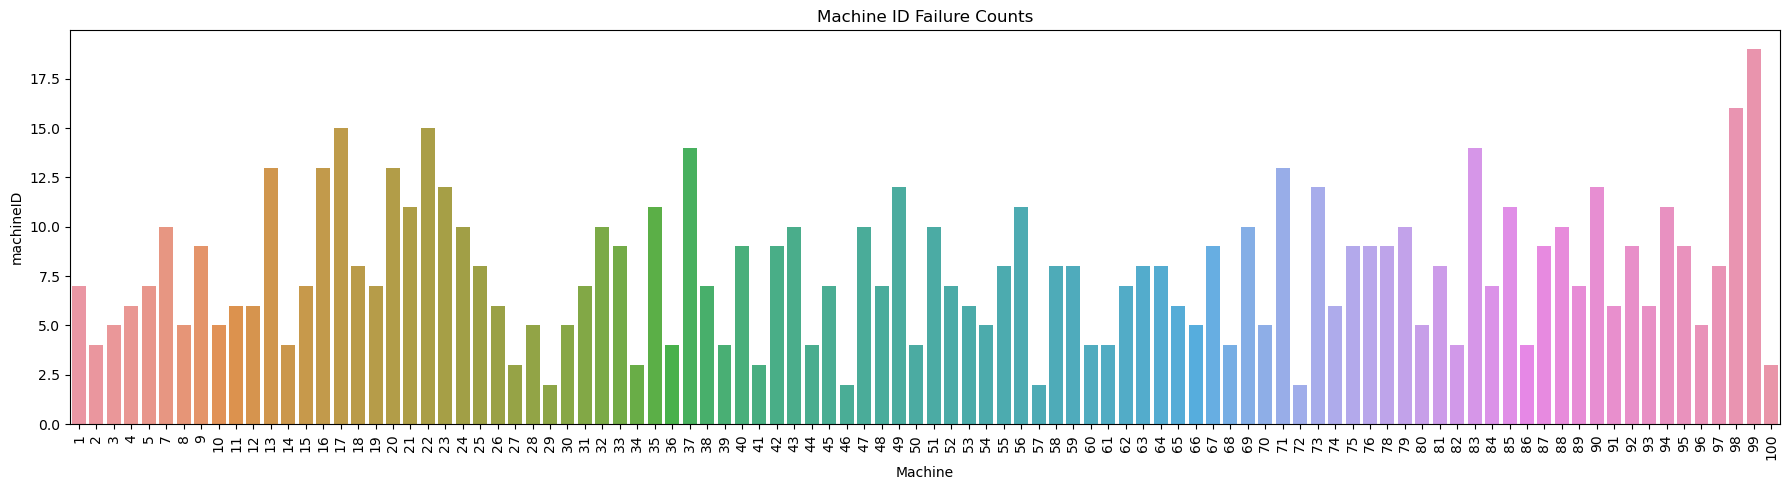

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data=mach_fail_plot_df, x='index', y='machineID')
plt.title("Machine ID Failure Counts")
plt.xticks(rotation=90)
plt.xlabel("machine")
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Machine Ages')

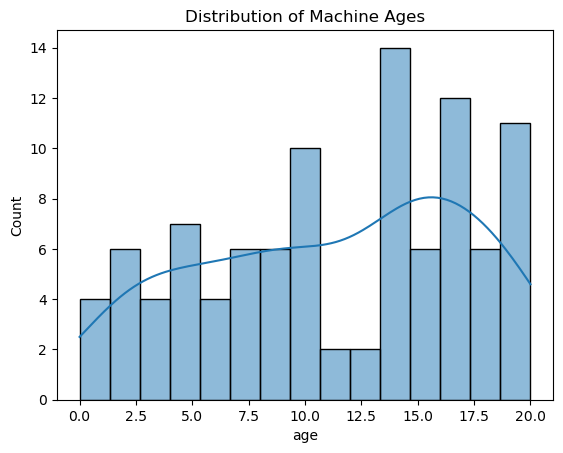

In [39]:
sns.histplot(
    data=machines['age'], 
    kde=True, 
    bins=15,             
)
plt.title('Distribution of Machine Ages')

Text(0.5, 1.0, 'Distribution of Machine Model Types')

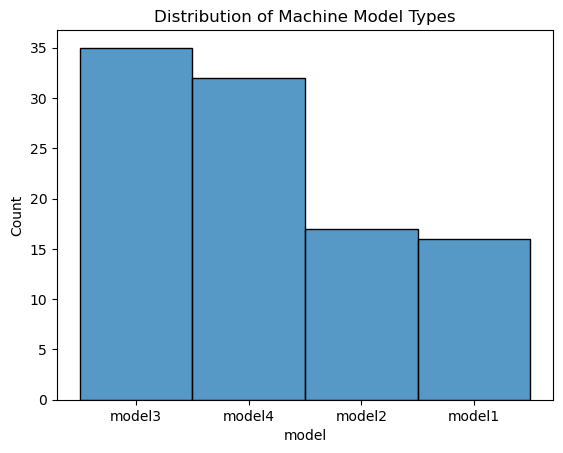

In [40]:
sns.histplot(
    data=machines['model']           
)
plt.title('Distribution of Machine Model Types')

In [46]:
fail_copy = failures.copy()
window_cols = ['machineID', 'failure']
fail_copy['datetime'] = pd.to_datetime(fail_copy['datetime'])

fail_copy = fail_copy.sort_values(by=window_cols + ['datetime'])
fail_copy['next_failure_time'] = fail_copy.groupby(window_cols)['datetime'].shift(-1)

fail_copy['time_between_failures'] = (
    fail_copy['next_failure_time'] - fail_copy['datetime']
)

fail_copy['time_between_failures_days'] = (
    fail_copy['time_between_failures'].dt.days
)

time_to_fail_df = fail_copy.dropna(subset=['next_failure_time'])
time_to_fail_df

,datetime,machineID,failure,next_failure_time,time_between_failures,time_between_failures_days
2,2015-04-20 06:00:00,1,comp2,2015-10-17 06:00:00,180 days,180.0
0,2015-01-05 06:00:00,1,comp4,2015-06-19 06:00:00,165 days,165.0
3,2015-06-19 06:00:00,1,comp4,2015-09-02 06:00:00,75 days,75.0
4,2015-09-02 06:00:00,1,comp4,2015-12-16 06:00:00,105 days,105.0
8,2015-03-19 06:00:00,2,comp2,2015-04-18 06:00:00,30 days,30.0
...,...,...,...,...,...,...
740,2015-01-18 06:00:00,99,comp4,2015-03-19 06:00:00,60 days,60.0
744,2015-03-19 06:00:00,99,comp4,2015-06-02 06:00:00,75 days,75.0
749,2015-06-02 06:00:00,99,comp4,2015-10-30 06:00:00,150 days,150.0
755,2015-10-30 06:00:00,99,comp4,2015-12-14 06:00:00,45 days,45.0


Text(0.5, 0, 'time between maintenance and next failure (days)')

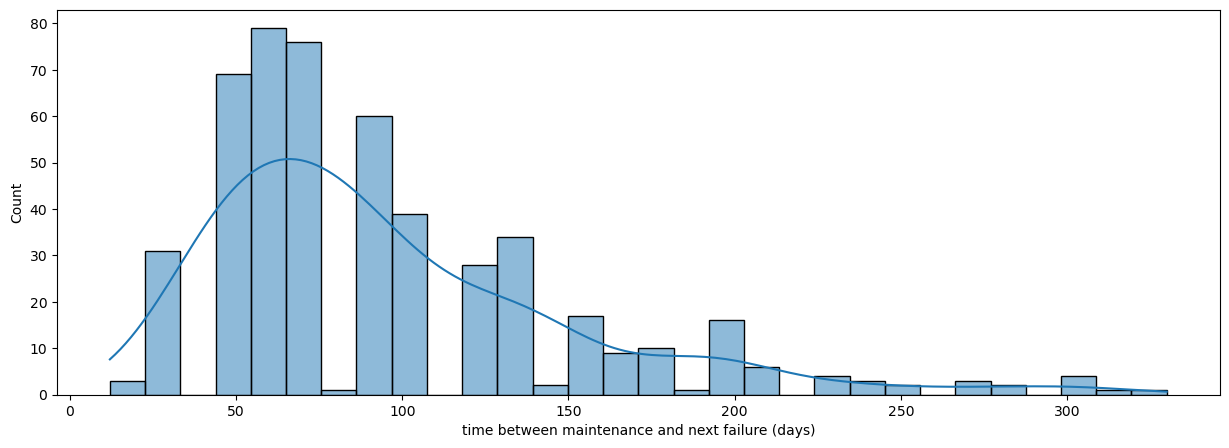

In [49]:
plt.figure(figsize=(15, 5))
sns.histplot(
    data=time_to_fail_df, 
    x='time_between_failures_days', 
    kde=True, 
    bins=30, 
)
plt.xlabel("time between maintenance and next failure (days)")